In [40]:
import numpy as np
import datetime
xmean = 18.5

In [21]:
sd = 5

In [22]:
n = 64

In [23]:
se = sd / np.sqrt(n)

In [24]:
se

0.625

In [ ]:
round(xmean + 1.96 * se,2)

In [26]:
round(xmean  2.576 * se,2)

17.27

In [27]:
3/(9/12)

4.0

In [28]:
import pandas as pd

In [86]:
df = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-an-bogdanov/london.csv")

In [87]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [88]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [89]:
import seaborn as sns

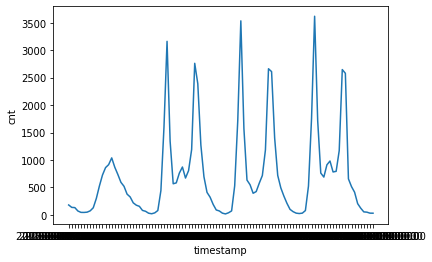

In [93]:
sns.lineplot(x = df.head(100).timestamp, y = df.head(100).cnt)

In [94]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [95]:
df["timestamp"] = pd.to_datetime(df.timestamp)

In [96]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [130]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [97]:
df.sort_values("timestamp").set_index("timestamp").resample(rule="D").cnt.sum().sort_values(ascending=False)

timestamp
2015-07-09    72504
2015-08-06    63468
2016-07-19    46021
2016-07-30    45608
2016-05-08    44758
              ...  
2016-12-24     7890
2016-01-02     7195
2017-01-01     6421
2016-01-03     4869
2016-09-02        0
Name: cnt, Length: 731, dtype: int64

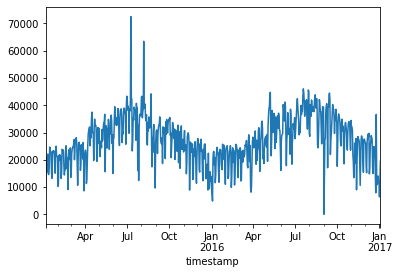

In [98]:
df.sort_values("timestamp").set_index("timestamp").resample(rule="D").cnt.sum().plot()

In [99]:
df_rol = pd.DataFrame(df.sort_values("timestamp").set_index("timestamp").resample(rule="D").cnt.sum().reset_index())

In [102]:
df_rol 

,timestamp,cnt,rol_cnt
0,2015-01-04,9234,NaN
1,2015-01-05,20372,NaN
2,2015-01-06,20613,16739.666667
3,2015-01-07,21064,20683.000000
4,2015-01-08,15601,19092.666667
...,...,...,...
726,2016-12-30,11566,12682.000000
727,2016-12-31,11424,12347.333333
728,2017-01-01,6421,9803.666667
729,2017-01-02,11823,9889.333333


In [100]:
df_rol["rol_cnt"] = df_rol.cnt.rolling(3).mean()

In [101]:
df_rol[df_rol.timestamp.dt.day == 9]

,timestamp,cnt,rol_cnt
5,2015-01-09,22104,19589.666667
36,2015-02-09,23858,17595.000000
64,2015-03-09,24037,23806.333333
95,2015-04-09,31520,30534.666667
125,2015-05-09,27810,28610.666667
156,2015-06-09,33255,33749.666667
186,2015-07-09,72504,50705.000000
217,2015-08-09,40441,39640.000000
248,2015-09-09,33116,32529.666667
278,2015-10-09,32006,31437.000000


In [103]:
df_rol["dif_rol"] = df_rol.cnt - df_rol.rol_cnt

In [104]:
df_rol

,timestamp,cnt,rol_cnt,dif_rol
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333
3,2015-01-07,21064,20683.000000,381.000000
4,2015-01-08,15601,19092.666667,-3491.666667
...,...,...,...,...
726,2016-12-30,11566,12682.000000,-1116.000000
727,2016-12-31,11424,12347.333333,-923.333333
728,2017-01-01,6421,9803.666667,-3382.666667
729,2017-01-02,11823,9889.333333,1933.666667


In [114]:
std = np.std(df_rol.dif_rol)

In [115]:
std

4558.58664111794

In [122]:
df_rol["upper_bound"] = df_rol.rol_cnt + std * 2.576

In [123]:
df_rol["lower_bound"] = df_rol.rol_cnt - std * 2.576

In [124]:
df_rol

,timestamp,cnt,rol_cnt,dif_rol,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479
...,...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854


In [125]:
round(24302.919188, 2)

24302.92

In [129]:
df_rol.query("cnt > upper_bound").sort_values("cnt")

,timestamp,cnt,rol_cnt,dif_rol,upper_bound,lower_bound
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812


In [133]:
df_rol.query("cnt < lower_bound").sort_values("cnt")

,timestamp,cnt,rol_cnt,dif_rol,upper_bound,lower_bound
607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
314,2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
678,2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812
130,2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
201,2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
615,2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
232,2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
621,2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
189,2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479


In [149]:
df.query("cnt == 0")

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
2015,2015-03-29 01:00:00,0,10.5,8.5,77.0,33.0,7.0,0.0,1.0,0.0


In [153]:
df.wind_speed

0         6.0
1         5.0
2         0.0
3         0.0
4         6.5
         ... 
17409    19.0
17410    21.0
17411    24.0
17412    23.0
17413    22.0
Name: wind_speed, Length: 17414, dtype: float64